# © Explore Data Science Academy

Honour Code
We {NM_2_Avengers}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.


# Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Data Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance 

<a id = "one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

If you have ever used a streaming website like Netflix, Showmax, or Youtube, a fter watching a movie, the platform begins suggesting more films and TV series of a similar kind. This is an illustration of a recommendation system. Recommender systems  recognize a user's viewing habits and offer pertinent advice. Recommender systems are economically and socially essential in today's technologically advanced world to enable people to make the best decisions possible regarding the information they consume on a daily basis. This is particularly true in the context of movie recommendations, where clever algorithms may guide viewers toward excellent films among tens of thousands of possibilities.

The task is to develop a collaborative filtering or content-based recommendation algorithm that can correctly forecast how a user would evaluate a film they haven't yet seen based on their past preferences.

Offering a precise and reliable solution to this problem has enormous economic potential since users will receive personalized suggestions, creating platform affinity for streaming services that make it easiest for their audience to watch.

# TEAM

1. THATO RABODIBA
2. KOKETSO MAHLANGU
3. ZITHULELE MANYATHI
4. NONTOKOZO NDLOVU
5. THABATHA NOMPOKO
6. MINENHLE MAPHUMOLO

<a id = "two"></a>
## 2. Problem Statement
<a href=#cont>Back to Table of Contents</a>

The goal is to create a collaborative filtering system or content-based recommendation algorithm that can accurately predict a user's evaluation of a movie they haven't seen based on their past preferences.

In [1]:
#!pip install comet_ml

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment


# Setting the API key (saved as environment variable)
experiment = Experiment(
  api_key="h2d2lfNX7NTFfv4141F24E74C",
  project_name="general",
  workspace="proudmamatoboys",
)

C:\Users\zithulele\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/proudmamatoboys/general/48b1c5c8d1ec40bb92204e34dda60acd



<a id="three"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

In [3]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time



# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))





<a id="four"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### Brief Description of the Datasets
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [4]:
#Reading all the given data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

In [5]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
train.shape

(10000038, 4)

In [8]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Data Preprocessing

In [9]:
movies.info() # Get concise summary of the movie dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
movies.head() # Get the first 5 observations 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
genome_scores.info() # Get concise summary of the Genome_tag Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [12]:
imdb.info() # Get concise of imdb database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [13]:
imdb.head() # Shows the first 5 observations

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [14]:
train.info() # Get the summary of the dataset's metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [15]:
train.isnull().sum() # check if there are any null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
train.head() # show the first 5 observations 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


# Exploratory Data Analysis¶

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


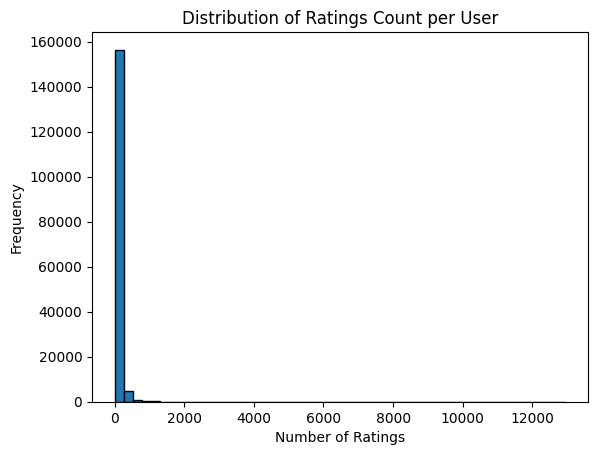

In [17]:
# Display summary statistics of numerical features in train data
print(train.describe())

# Visualize the distribution of ratings for each user
user_rating_counts = train.groupby('userId')['rating'].count()
plt.hist(user_rating_counts, bins=50, edgecolor='black')
plt.title('Distribution of Ratings Count per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

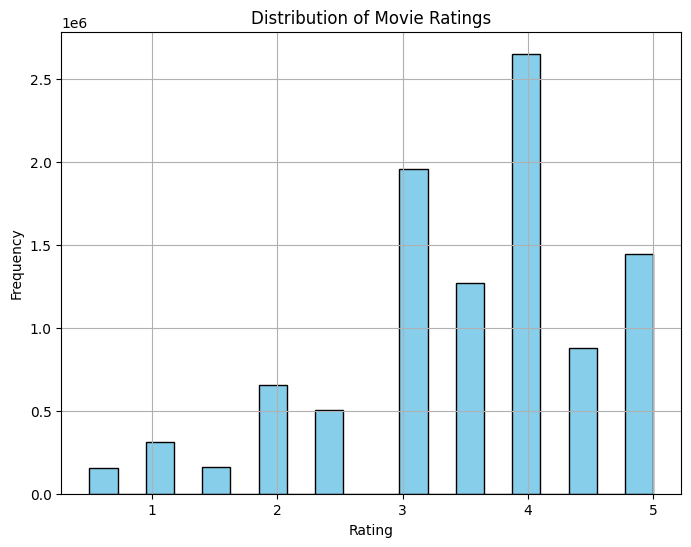

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



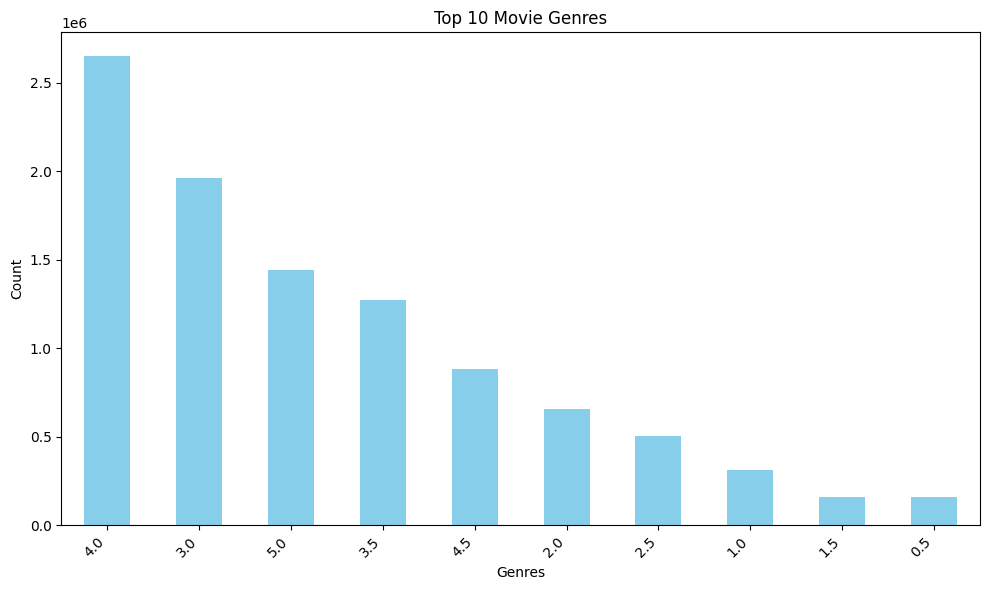

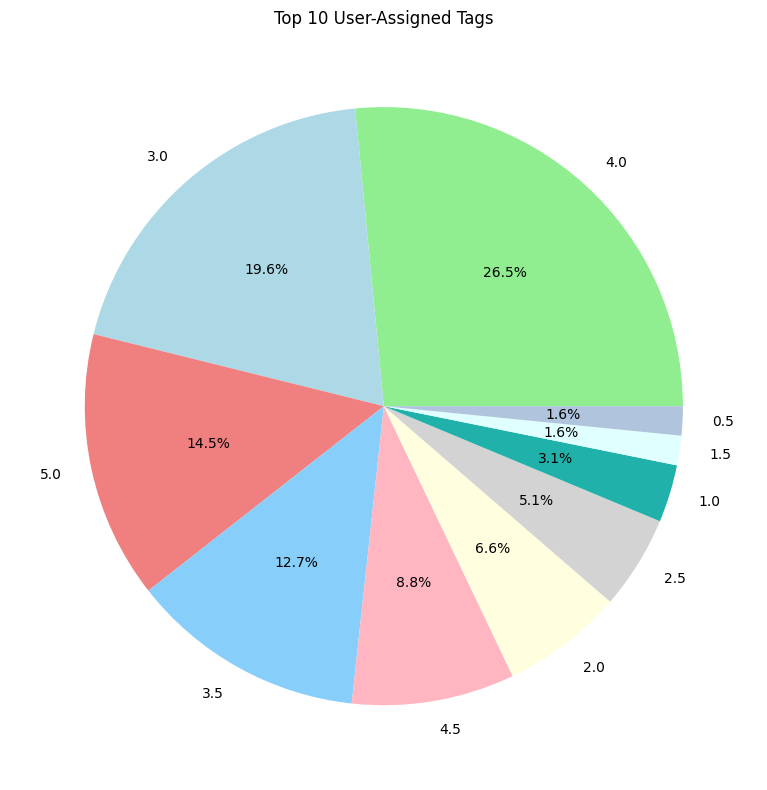

In [19]:
# Visualize distribution of movie genres using a bar plot
plt.figure(figsize=(10, 6))
genre_counts = train['rating'].value_counts().head(10)  
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Visualize distribution of user-assigned tags using a pie chart
plt.figure(figsize=(8, 8))
tag_counts = train['rating'].value_counts().head(10) 
tag_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsteelblue'])
plt.title('Top 10 User-Assigned Tags')
plt.ylabel('') 
plt.tight_layout()
plt.show()

In [20]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


In [21]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(train.groupby('userId')['rating'].agg('mean').reset_index())
train1_2 = pd.DataFrame(train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe
train1 = train1.merge(train1_2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train1.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


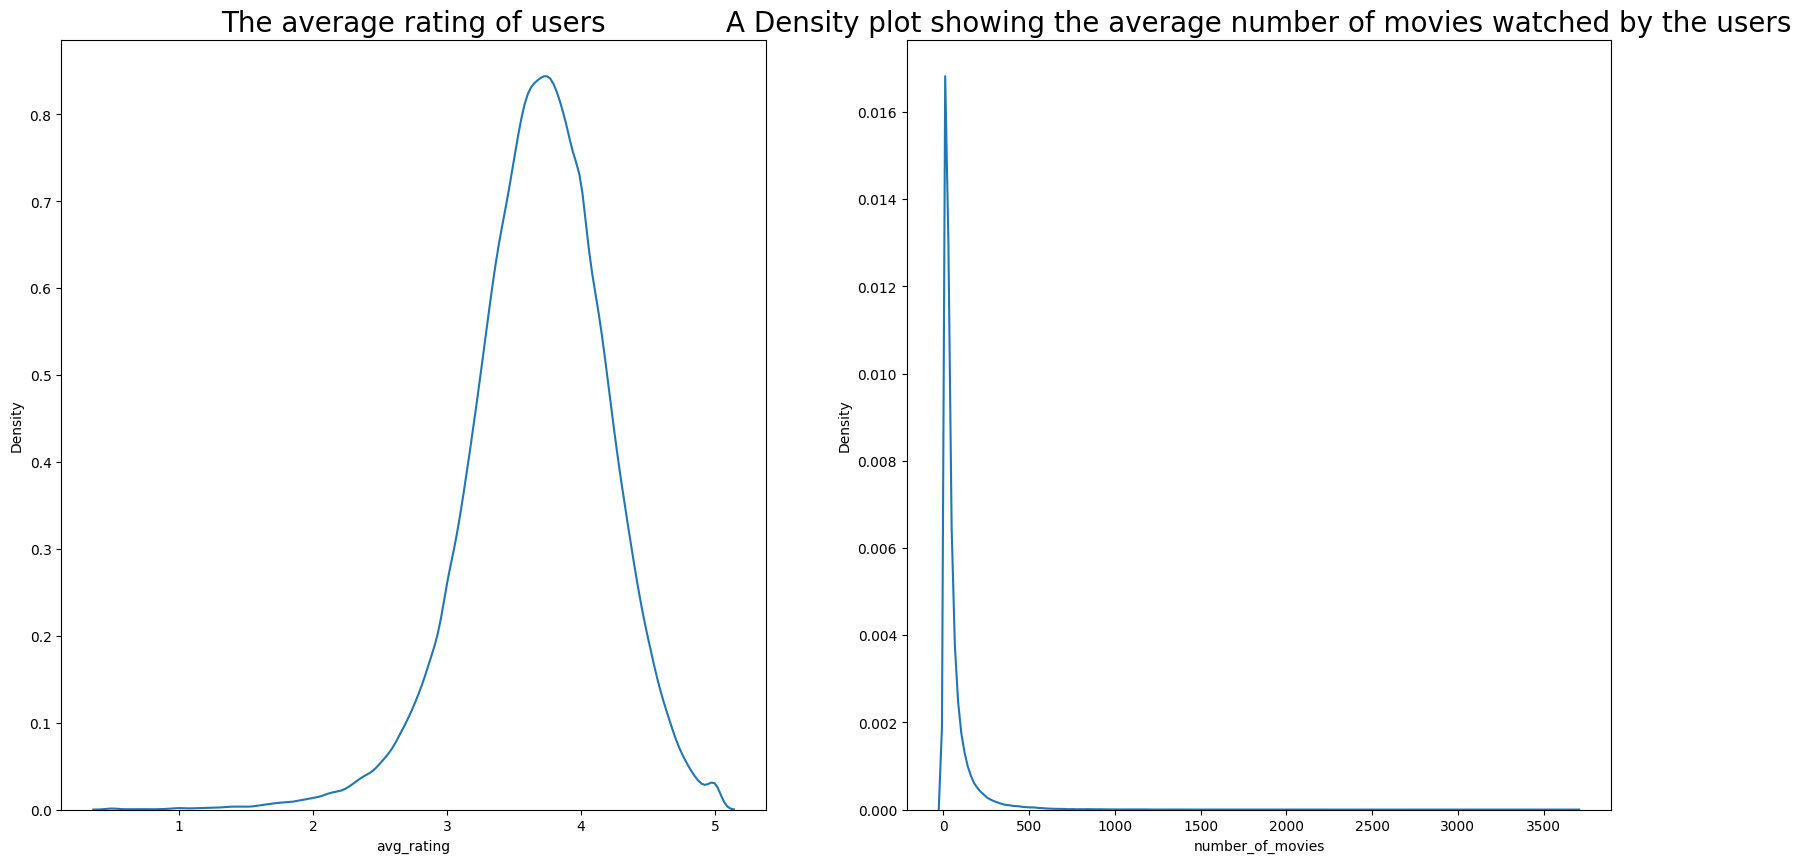

In [22]:
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

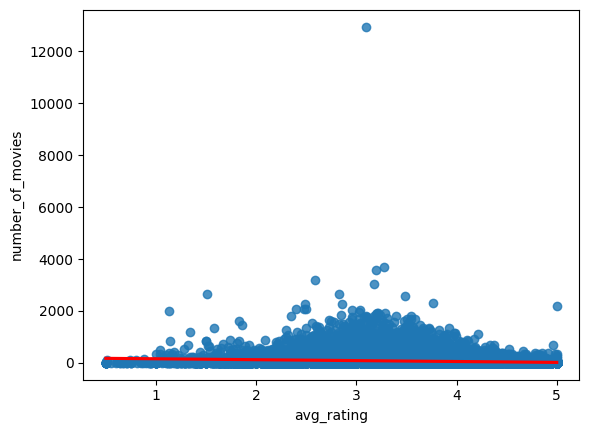

In [23]:
# Check for correlation between average rating and the number of the times have the user has watch a movie

# Create a scatter plot to visualise 
sns.regplot(data = train1, y = "number_of_movies", x = "avg_rating",line_kws={"color": "red"})

# Show the scatterplot
plt.show()

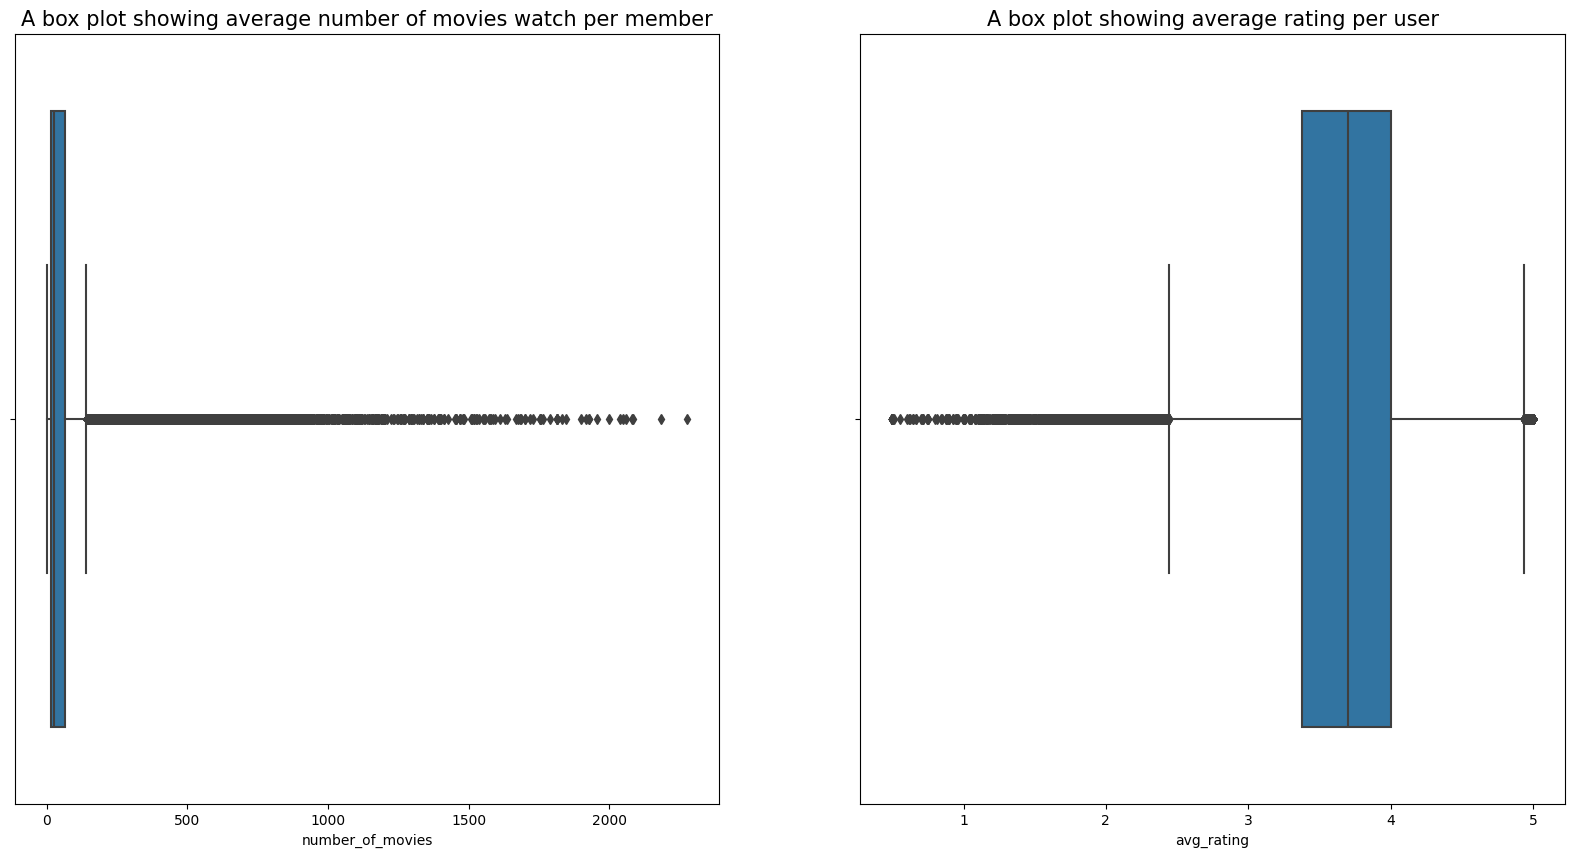

In [24]:
fig,ax = plt.subplots(1,2,figsize = (20,10))


sns.boxplot(ax =ax[0],x = train1.iloc[10:,2])

ax[0].set_title("A box plot showing average number of movies watch per member", fontsize = 15)
sns.boxplot(ax = ax[1],x = train1.iloc[10:,1] )

ax[1].set_title("A box plot showing average rating per user", fontsize = 15)
plt.show()

In [25]:
train.rating.value_counts()

rating
4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: count, dtype: int64

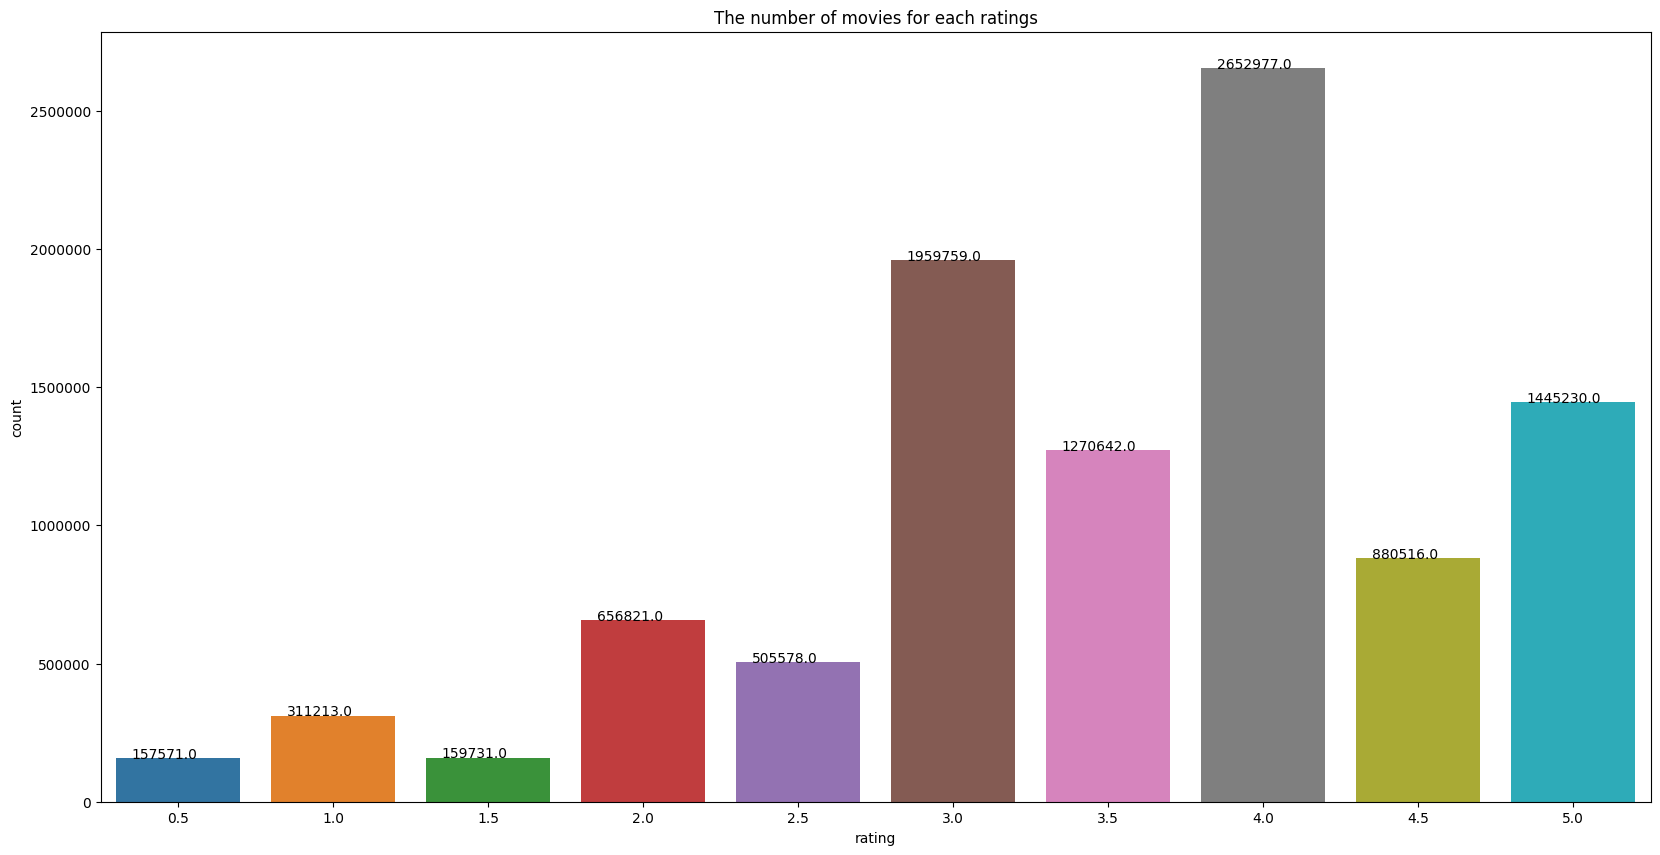

In [26]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) 

sns.countplot(ax=ax, x='rating', data=train) 
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

In [27]:
train_movies = train.merge(movies,on = 'movieId') # Merges the movie and train datasets
train_movies.drop(columns=['timestamp'],inplace=True) # Dropping the timestamp column
train_movies.head(10) # Shows the first 10 observations

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller
5,120949,81768,3.0,"Man Who Could Work Miracles, The (1936)",Comedy|Fantasy
6,19630,62049,4.0,1984 (1956),Drama|Sci-Fi
7,21066,2282,1.0,Pecker (1998),Comedy|Drama
8,117563,120474,4.0,Toy Story That Time Forgot (2014),Animation|Children
9,144018,1997,5.0,"Exorcist, The (1973)",Horror|Mystery


In [28]:
# Display links data
print(links.head())

# Check for missing values in links data
print(links.isnull().sum())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(movies.head())

# Summary statistics
print(movies.describe())

# Check for missing values
print(movies.isnull().sum())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000
movieId    0
title      0
genres     0
dtype: int64


In [30]:
# Sort the DataFrame by the years 
train = train.sort_values('rating',ascending=True).reset_index()

# Show first 5 observations from DataFrame
train.head()

,index,userId,movieId,rating,timestamp
0,8180253,47029,3157,0.5,1377807088
1,9772946,131800,182823,0.5,1525954640
2,6042065,71029,1466,0.5,1107169449
3,6292140,51301,113348,0.5,1477332974
4,1445437,104225,4886,0.5,1503515594


In [31]:
def get_Decade_df(train_df):
    """
    Calculate the number of movies falling into each decade based on their release years.
    
    Args:
    train (DataFrame): DataFrame containing movie information including release years.
    
    Returns:
    list: A list containing counts of movies for each decade.
    """
    counts = [0] * 10  # Initialize a list to store counts for each decade
    
    # Iterate over rows in the dataframe
    for year in train_df['rating']:
        if pd.isna(year):  # Skip NaN values
            continue
        decade = int(year) // 10 * 10  # Determine the decade
        if decade < 1800:  # Skip years before 1800
            continue
        if decade >= 2010:  # Skip years after 2010
            continue
        counts[(decade - 1800) // 10] += 1  # Increment count for the corresponding decade
    
    return counts

counts = get_Decade_df(train)  # Call the function with the train3 dataframe


In [32]:
import pandas as pd

years = ['1800 - 1899', '1900 - 1919', '1920 - 1939', '1940 - 1959', '1960 - 1969', '1970 - 1979', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - till date']

# Assuming counts is defined elsewhere in your code
counts = [100, 200, 150, 250, 300, 400, 350, 500, 600, 700]

# Check if the lengths of years and counts match
if len(years) != len(counts):
    print("Error: Lengths of 'years' and 'counts' lists do not match.")
else:
    # Create a dictionary from the lists
    counts_dict = {'era': years, 'count': counts}

    # Create a DataFrame from the dictionary
    counts_df = pd.DataFrame(counts_dict)

    # Display the DataFrame
    print(counts_df)


                era  count
0       1800 - 1899    100
1       1900 - 1919    200
2       1920 - 1939    150
3       1940 - 1959    250
4       1960 - 1969    300
5       1970 - 1979    400
6       1980 - 1989    350
7       1990 - 1999    500
8       2000 - 2009    600
9  2010 - till date    700


C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\AppData\Local\Temp\ipykernel_12688\2368774124.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(years, rotation=45, ha="right")


array([<Axes: title={'center': 'Trend of movie releases per 10-year period'}, xlabel='era', ylabel='count'>,
       <Axes: xlabel='count', ylabel='era'>], dtype=object)

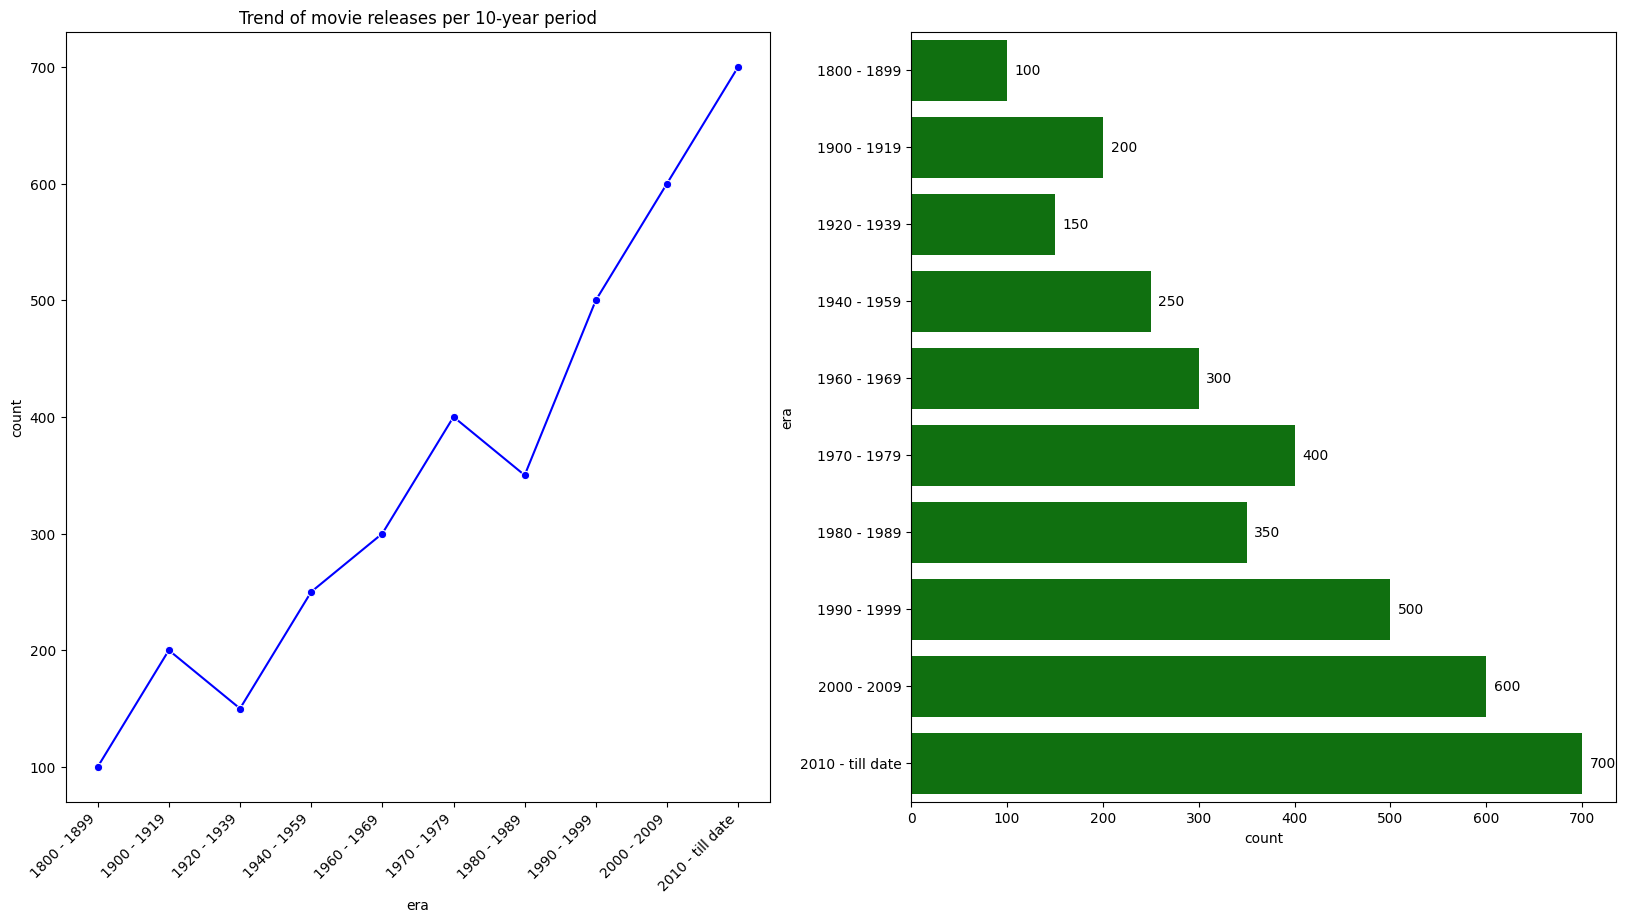

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Initialize the plot with set figure size

# Create a lineplot to visualize the trend per 10 year period
sns.lineplot(ax=ax[0], x='era', y='count', data=counts_df, marker='o', color='blue')

# Fix x tick labels for readability  
ax[0].set_xticklabels(years, rotation=45, ha="right")

# Create a barplot to visualize how many movies were released per 10 year period 
sns.barplot(ax=ax[1], x='count', y='era', data=counts_df, color='green')

# Labeling the bars on the bar plot
for p in ax[1].patches:
    ax[1].annotate(format(p.get_width(), '.0f'), 
                   (p.get_width(), p.get_y() + p.get_height() / 2), 
                   ha = 'center', va = 'center', 
                   xytext = (15, 0), 
                   textcoords = 'offset points')

# Set titles for the subplots
ax[0].set_title('Trend of movie releases per 10-year period')
ax


In [34]:
import pandas as pd

# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']])

# Split genres separated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.str.split('|')

# Create an expanded dataframe where each movie-genre combination is in a separate row
movies_genres = movies_genres.explode('genres')

movies_genres.head()


,movieId,genres
0,1,Adventure
0,1,Animation
0,1,Children
0,1,Comedy
0,1,Fantasy


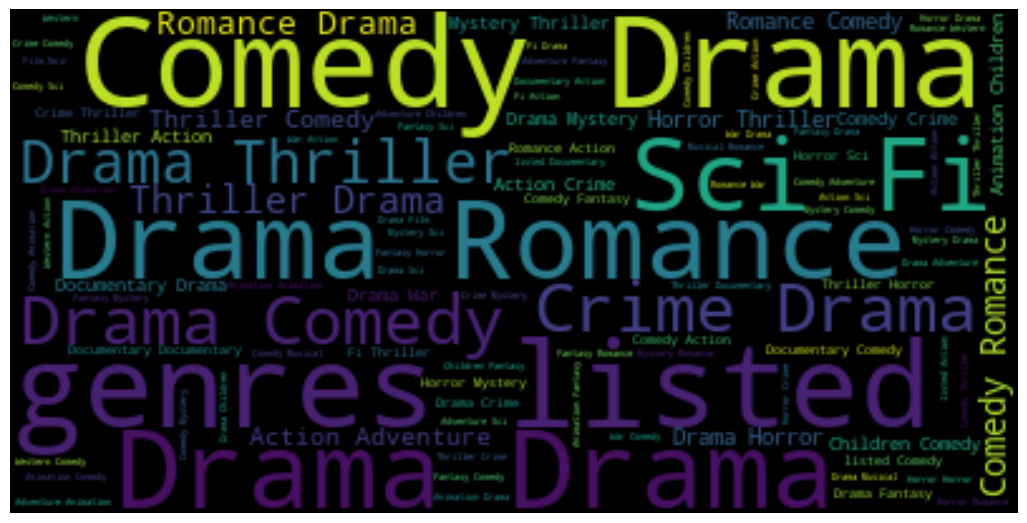

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all genres into a single string
text = ' '.join(movies_genres['genres'].astype(str).values)

# Initialize the word cloud object
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords=set(STOPWORDS))

# Generate the word cloud
wordcloud.generate(text)

# Plot the word cloud
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


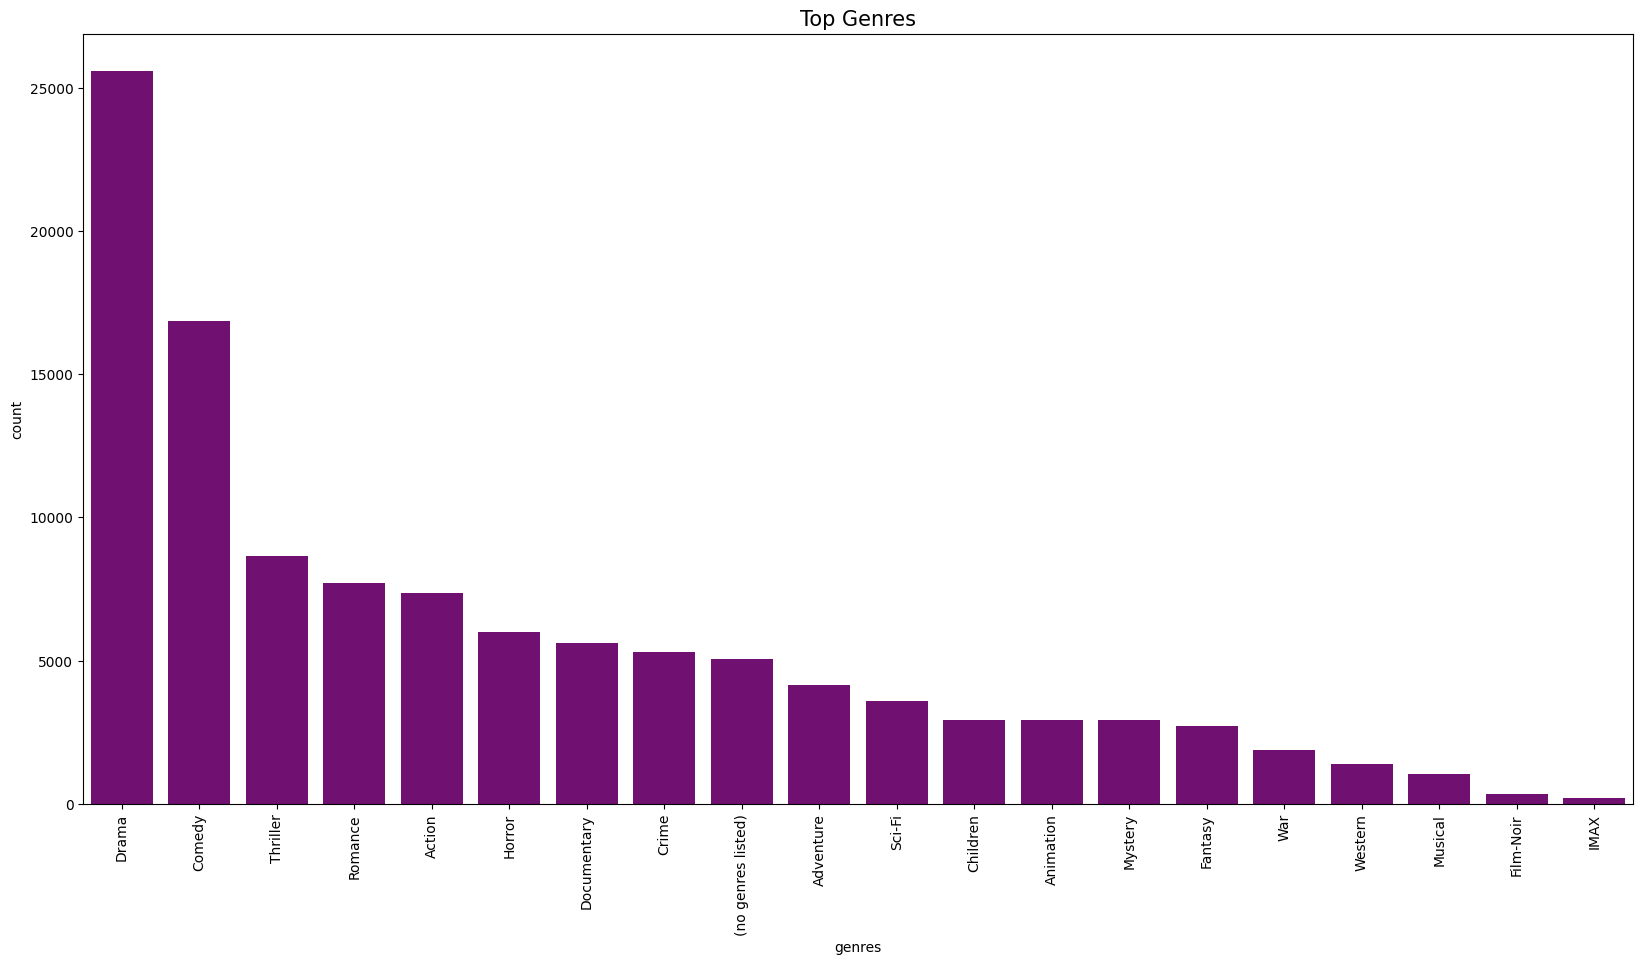

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = movies_genres['genres'].explode()
ax = sns.countplot(x=gen, order=gen.value_counts().index[:30], color='purple')
ax.set_title('Top Genres', fontsize=15)
plt.xticks(rotation=90)
plt.style.use("dark_background")
plt.show()


C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

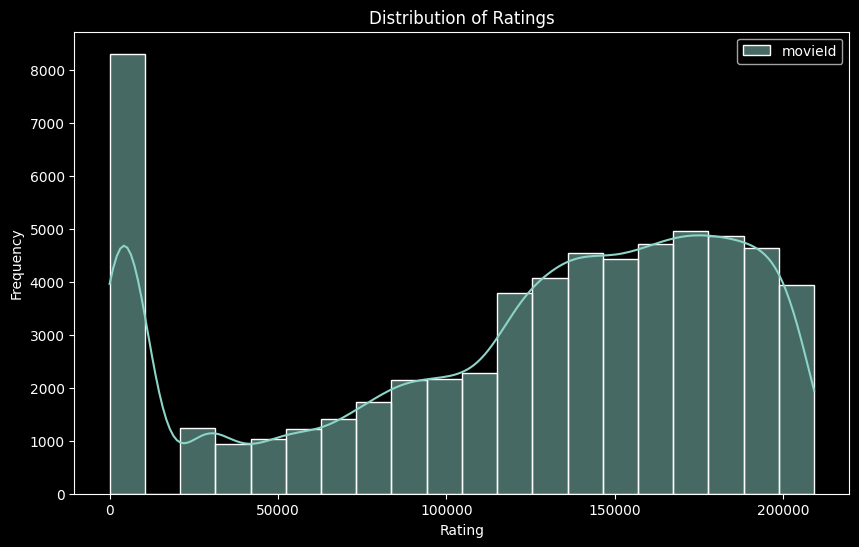

In [37]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

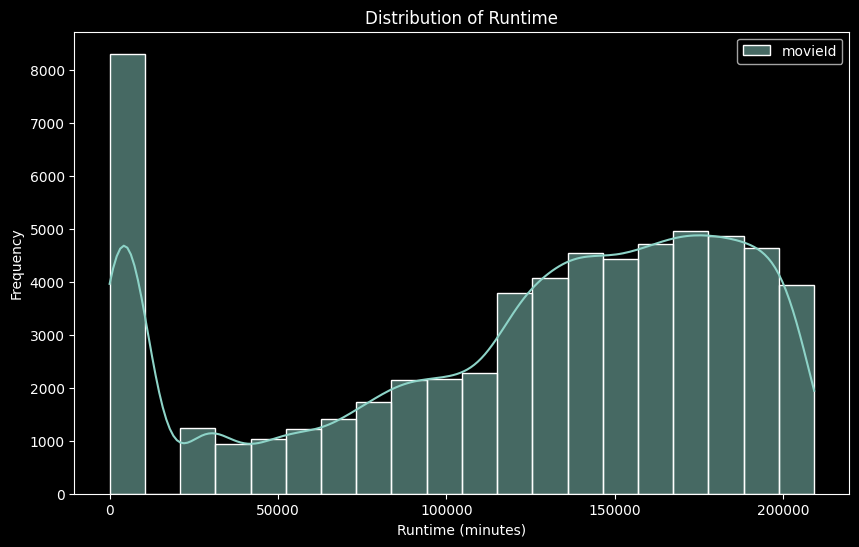

In [38]:
# Distribution of Runtime
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='orange')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

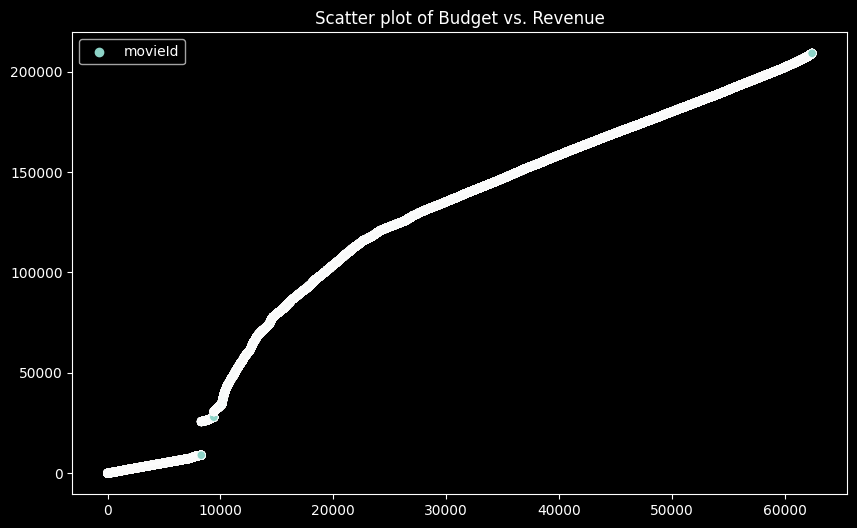

In [39]:
# Revenue vs. Budget Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, color='green')
plt.title('Scatter plot of Budget vs. Revenue')
plt.show()

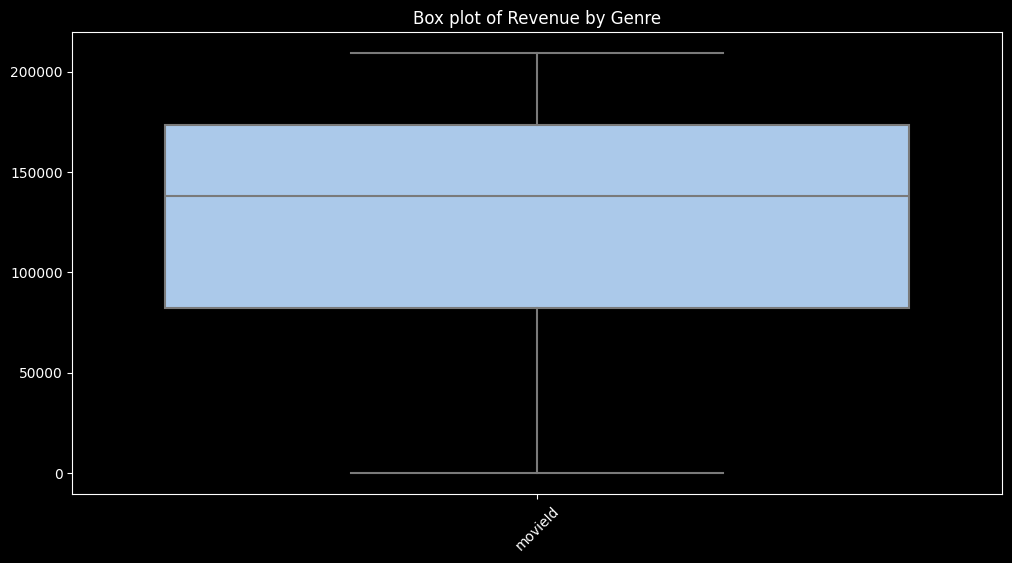

In [40]:
# Revenue by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, palette='pastel')
plt.title('Box plot of Revenue by Genre')
plt.xticks(rotation=45)
plt.show()

C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zithulele\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


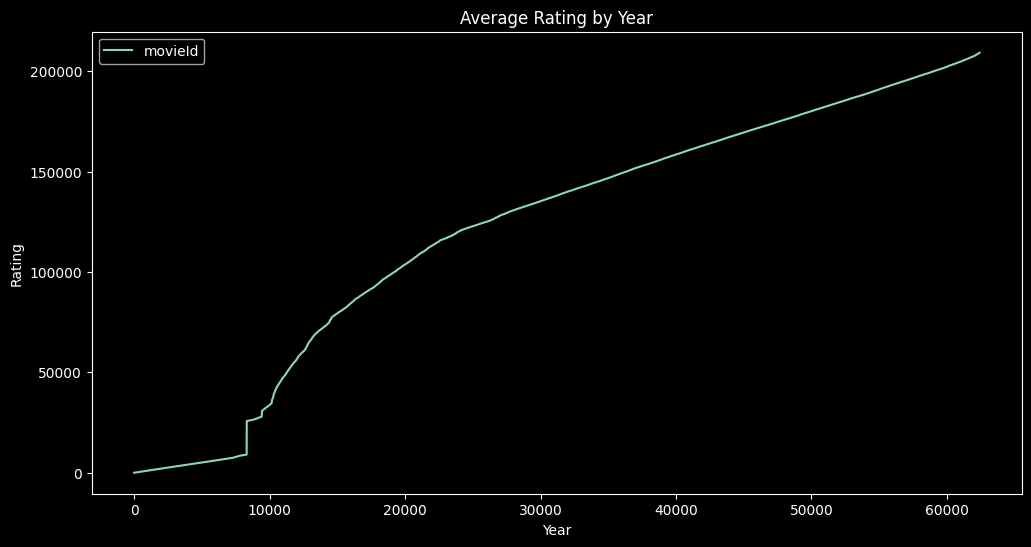

In [41]:
# Rating by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies, color='red')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

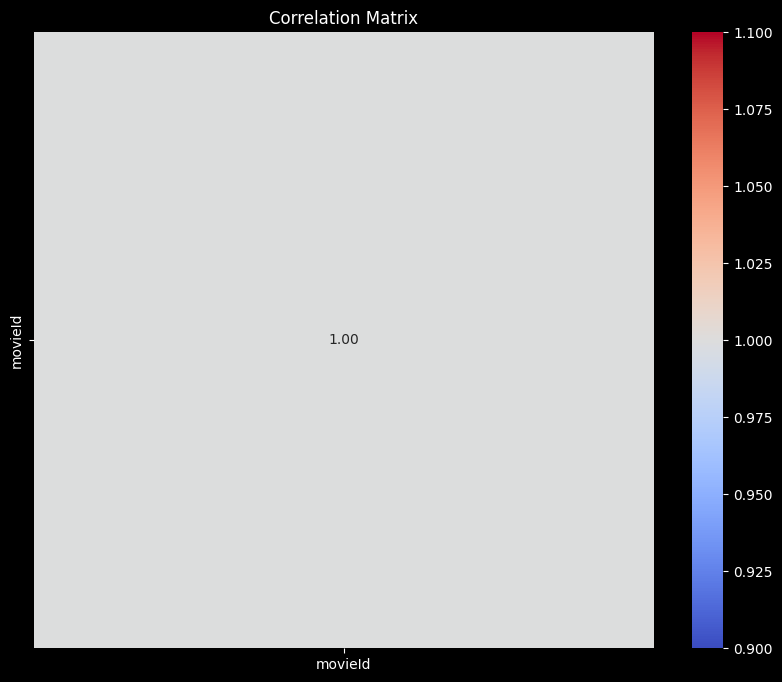

In [42]:
# Exclude non-numeric columns
numeric_columns = movies.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
